In [1]:
import pandas as pd 
import sklearn
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, f1_score

from imblearn.metrics import classification_report_imbalanced
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import ClusterCentroids

In [3]:
cc_df=pd.read_csv("creditcard.csv")

# Split into Train / Test Sets
x=cc_df.drop(columns='Class',axis=1)

y=cc_df[['Class']].copy()

xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=1)

In [4]:
# Oversampling (Smote) + (Random Forest / MLPC / LR)
xsmote,ysmote=SMOTE(random_state=1,sampling_strategy=1.0).fit_resample(xtrain,ytrain)

In [6]:
from imblearn.ensemble import BalancedRandomForestClassifier
brf=BalancedRandomForestClassifier(n_estimators=100,random_state=1)
brf.fit(xsmote,ysmote.values.ravel())
brf_pred=brf.predict(xtest)
brf_f1=f1_score(ytest,brf_pred)
brf_auc=roc_auc_score(ytest,brf_pred)
print(classification_report_imbalanced(ytest,brf_pred))
print("ACCURACY: "+str(accuracy_score(ytest,brf_pred)))
print("AREA UNDER CURVE: "+str(brf_auc))
print("F1-SCORE: "+str(brf_f1))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      0.78      1.00      0.89      0.80     71091
          1       0.85      0.78      1.00      0.82      0.89      0.77       111

avg / total       1.00      1.00      0.78      1.00      0.89      0.80     71202

ACCURACY: 0.9994522625768939
AREA UNDER CURVE: 0.891786393305573
F1-SCORE: 0.8169014084507041


In [9]:
from sklearn.neural_network import MLPClassifier
mlpc=MLPClassifier(hidden_layer_sizes=(100,),max_iter=250)
mlpc.fit(xsmote,ysmote.values.ravel())
mlpc_pred=mlpc.predict(xtest)
mlpc_f1=f1_score(ytest,mlpc_pred)
mlpc_auc=roc_auc_score(ytest,mlpc_pred)
print(classification_report_imbalanced(ytest,mlpc_pred))
print("ACCURACY: "+str(accuracy_score(ytest,mlpc_pred)))
print("AREA UNDER CURVE: "+str(mlpc_auc))
print("F1-SCORE: "+str(mlpc_f1))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.97      0.91      0.98      0.94      0.89     71091
          1       0.04      0.91      0.97      0.08      0.94      0.88       111

avg / total       1.00      0.97      0.91      0.98      0.94      0.89     71202

ACCURACY: 0.9686385213898486
AREA UNDER CURVE: 0.9393200644624876
F1-SCORE: 0.08295687885010267


In [8]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='lbfgs', random_state=1, max_iter=1000)
model.fit(xsmote,ysmote.values.ravel())
lr_pred=model.predict(xtest)
lr_f1=f1_score(ytest,lr_pred)
lr_auc=roc_auc_score(ytest,lr_pred)
print(classification_report_imbalanced(ytest,lr_pred))
print("ACCURACY: "+str(accuracy_score(ytest,lr_pred)))
print("AREA UNDER CURVE: "+str(lr_auc))
print("F1-SCORE: "+str(lr_f1))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.99      0.85      0.99      0.92      0.85     71091
          1       0.12      0.85      0.99      0.20      0.92      0.83       111

avg / total       1.00      0.99      0.85      0.99      0.92      0.85     71202

ACCURACY: 0.9896351226089155
AREA UNDER CURVE: 0.9183524580410262
F1-SCORE: 0.20302375809935205


In [11]:
# Combination Sampling + Decision Tree
from sklearn.tree import DecisionTreeClassifier
smote_enn=SMOTEENN(random_state=0)
xsmtn,ysmtn=smote_enn.fit_resample(xtrain,ytrain)

clf=DecisionTreeClassifier(random_state=0)
clf.fit(xsmtn,ysmtn.values.ravel())
clf_pred=clf.predict(xtest)
clf_f1=f1_score(ytest,clf_pred)
clf_auc=roc_auc_score(ytest,clf_pred)
print(classification_report_imbalanced(ytest,clf_pred))
print("ACCURACY: "+str(accuracy_score(ytest,clf_pred)))
print("AREA UNDER CURVE: "+str(clf_auc))
print("F1-SCORE: "+str(clf_f1))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      0.77      1.00      0.87      0.78     71091
          1       0.43      0.77      1.00      0.55      0.87      0.75       111

avg / total       1.00      1.00      0.77      1.00      0.87      0.78     71202

ACCURACY: 0.9980337630965422
AREA UNDER CURVE: 0.8820810936268589
F1-SCORE: 0.5483870967741936


In [12]:
# No sampling
import xgboost as xgb

xgb=xgb.XGBClassifier(
    learning_rate=0.05,
    max_depth=2,
    n_estimators=100,
    scale_pos_weight=5)
xgb.fit(xtrain,ytrain.values.ravel())
xgb_pred=xgb.predict(xtest)
xgb_f1=f1_score(ytest,xgb_pred)
xgb_auc=roc_auc_score(ytest,xgb_pred)
print(classification_report_imbalanced(ytest,xgb_pred))
print("ACCURACY: "+str(accuracy_score(ytest,xgb_pred)))
print("AREA UNDER CURVE: "+str(xgb_auc))
print("F1-SCORE: "+str(xgb_f1))

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:23:55] WARNING: /private/var/folders/tn/scrc7fy54771ngyq24hw419m0000gn/T/pip-install-fp4t23h0/xgboost/build/temp.macosx-10.9-x86_64-3.8/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      0.77      1.00      0.88      0.79     71091
          1       0.75      0.77      1.00      0.76      0.88      0.76       111

avg / total       1.00      1.00      0.78      1.00      0.88      0.79     71202

ACCURACY: 0.9992556388865481
AREA UNDER CURVE: 0.8871904566929254
F1-SCORE: 0.7644444444444445


In [26]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# define a random state
random_state = 42

# determine the number of fraud cases
fraud = cc_df[cc_df['Class'] == 1]
valid = cc_df[cc_df['Class'] == 0]

outlier_fraction = len(fraud) / float(len(valid))

# get the columns from the dataframe
columns = cc_df.columns.tolist()

# filter the columns to remove the data we do not want
columns = [c for c in columns if c not in ['Class']]

# store the variable we will be predicting on which is class
target = 'Class'

# X includes everything except our class column
X = cc_df[columns]
# Y includes all the class labels for each sample
# this is also one-dimensional
Y = cc_df[target]

# define the outlier detection methods
classifiers = {
    # contamination is the number of outliers we think there are
    'Isolation Forest': IsolationForest(max_samples = len(X),
                                       contamination = outlier_fraction,
                                       random_state = random_state),
    # number of neighbors to consider, the higher the percentage of outliers the higher you want to make this number
    'Local Outlier Factor': LocalOutlierFactor(
    n_neighbors = 20,
    contamination = outlier_fraction)
}

n_outliers = len(fraud)

for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the data and tag outliers
    if clf_name == 'Local Outlier Factor':
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
        
    # reshape the prediction values to 0 for valid and 1 for fraud
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1

    # calculate the number of errors
    n_errors = (y_pred != Y).sum()

Text(0.5, 0, 'AUC Score')

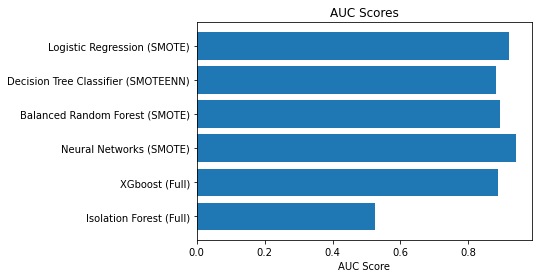

In [30]:
## Performance Plot
import matplotlib.pyplot as plt
auc_scores={
    'Isolation Forest (Full)': roc_auc_score(Y, y_pred),
    'XGboost (Full)':xgb_auc,
    'Neural Networks (SMOTE)':mlpc_auc,
    'Balanced Random Forest (SMOTE)':brf_auc,
    'Decision Tree Classifier (SMOTEENN)':clf_auc,
    'Logistic Regression (SMOTE)':lr_auc
}

f1_scores={
    'Isolation Forest (Full)': f1_score(Y, y_pred),
    'XGboost (Full)':xgb_f1,
    'Neural Networks (SMOTE)':mlpc_f1,
    'Balanced Random Forest (SMOTE)':brf_f1,
    'Decision Tree Classifier (SMOTEENN)':clf_f1,
    'Logistic Regression (SMOTE)':lr_f1
}

plt.title('AUC Scores')
plt.barh(range(len(auc_scores)), list(auc_scores.values()), align='center')
plt.yticks(range(len(auc_scores)), list(auc_scores.keys()))
plt.xlabel('AUC Score')

Text(0.5, 0, 'F1 Score')

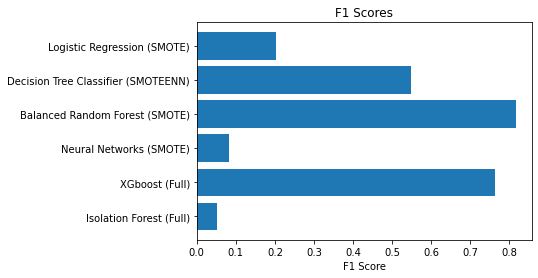

In [31]:
plt.title('F1 Scores')
plt.barh(range(len(f1_scores)), list(f1_scores.values()), align='center')
plt.yticks(range(len(f1_scores)), list(f1_scores.keys()))
plt.xlabel('F1 Score')